# 18장 시퀀스 배열로 다루는 순환 신경망(RNN)

## 시퀀스 배열로 다루는 순환 신경망
- 인공지능이 문장을 듣고 이해한다는 것은 많은 문장을 '이미 학습(train)해 놓았다'는 것을 의미
- 문장은 여러 개의 단어로 이루어져 있으며 그 의미를 전달하려면 각 단어가 정해진 순서대로 입력되어야 함
- 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제가 발생

## RNN 방법론의 도입
- 순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력 받은 데이터를 잠시 기억해 두는 방법
- 기억된 데이터가 얼마나 중요한지 판단하고 별도의 가중치를 주어 다음 데이터로 넘어감
- 입력 값이 같은 층 안에서 맴도는 성질 때문에 순환 신경망이라 칭함

## RNN 방식의 장점
- 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에 적용할 수 있다
    - 다수 입력 단일 출력 _문장을 읽고 뜻을 파악할 때 활용
    - 단일 입력 다수 출력 _사진의 캡션을 만들 때 활용
    - 다수 입력 다수 출력 _문장을 번역할 때 활용

## LSTM ( Long Short Term Memory) 기법의 도입
- RNN은 한 층에서 반복을 많이 해야 하기 때문에 일반 신경망보다 기울기 소실 문제가 더 많이
    발생하고 이를 해결하기 어렵다는 한계가 있었음
- 이 단점을 극복하기 위해 LSTM(Long Short Term Memory) 기법이 등장


[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch18-colab.ipynb)

## 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

- 입력된 문장 의미를 파악하는 것은 모든 단어를 종합해 하나의 카테고리로
    분류하는 작업

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
#(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
(X_train, y_train), (X_test, y_test) = reuters.load_data(test_split=0.2)  
# 모든 내용이 나오도록 num_word 삭제

# 단어-인덱스 딕셔너리 가져오기
word_index = reuters.get_word_index()

# 인덱스-단어 딕셔너리로 변경
index_word_dict = {index: word for word, index in word_index.items()}

# 첫 번째 뉴스 기사 디코딩
decoding = ' '.join([index_word_dict.get(i - 3, '') for i in X_train[0]])

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

print('decoding:', decoding)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
decoding:  mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [2]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100) # 총 100개 단어
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [3]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 8s 10ms/step - loss: 2.1677 - accuracy: 0.4421 - val_loss: 1.8332 - val_accuracy: 0.5165
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.8687 - accuracy: 0.5209 - val_loss: 1.7629 - val_accuracy: 0.5508
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6623 - accuracy: 0.5717 - val_loss: 1.6885 - val_accuracy: 0.5699
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.5803 - accuracy: 0.5930 - val_loss: 1.5858 - val_accuracy: 0.6020
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4567 - accuracy: 0.6285 - val_loss: 1.4990 - val_accuracy: 0.6180
Epoch 6/200
450/450 [==============================] - 4s 9ms/step - loss: 1.3176 - accuracy: 0.6623 - val_loss: 1.3835 - val_accuracy: 0.6572
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2032 - accuracy: 0.6935 - val_loss: 1.3330 - val_accuracy: 0.669

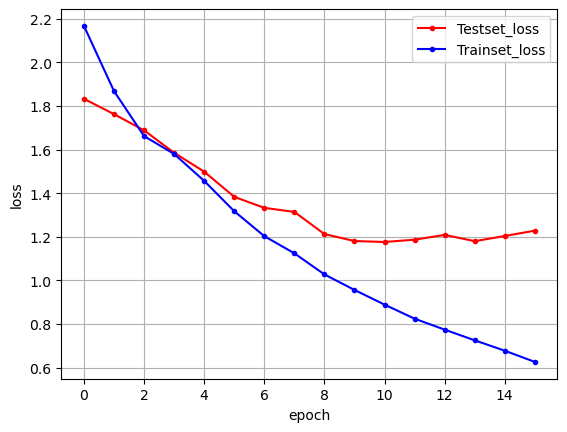

In [4]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [6]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 25s 17ms/step - loss: 0.4135 - accuracy: 0.7971 - val_loss: 0.2882 - val_accuracy: 0.8858
Epoch 2/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2345 - accuracy: 0.9107 - val_loss: 0.2662 - val_accuracy: 0.8906
Epoch 3/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1848 - accuracy: 0.9317 - val_loss: 0.2734 - val_accuracy: 0.8885
Epoch 4/100
469/469 [==============================] - 8s 16ms/step - loss: 0.1504 - accuracy: 0.9462 - val_loss: 0.2816 - val_accuracy: 0.8806
Epoch 5/100
782/782 [==============================] - 4s 6ms/step - loss: 0.3278 - accuracy: 0.8792

 Test Accuracy: 0.8792


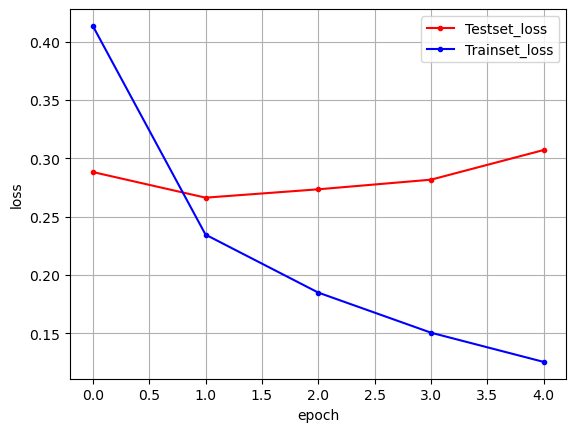

In [7]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3. 어텐션을 사용한 신경망

In [8]:
# attention 모듈 설치 현재는 시스템 쉘에서 설치한것
!pip install attention

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention()) # 어텐션 스코어와 어텐션 가중치를 계산 
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 33s 51ms/step - loss: 0.3668 - accuracy: 0.8352 - val_loss: 0.2792 - val_accuracy: 0.8842
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 0.2252 - accuracy: 0.9140 - val_loss: 0.2662 - val_accuracy: 0.8910
Epoch 3/100
625/625 [==============================] - 32s 52ms/step - loss: 0.1688 - accuracy: 0.9348 - val_loss: 0.3127 - val_accuracy: 0.8877
Epoch 4/100
625/625 [==============================] - 33s 53ms/step - loss: 0.1166 - accuracy: 0.9559 - val_loss: 0.3439 - val_accuracy: 0.8809
Epoch 5/100
782/782 [==============================] - 10s 12ms/step - loss: 0.4166 - accuracy: 0.8796

 Test Accuracy: 0.8796


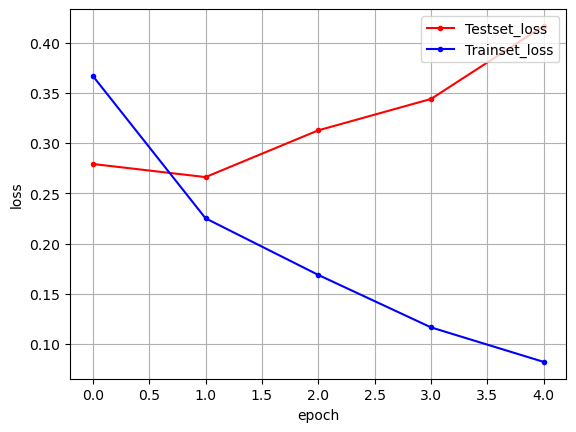

In [10]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()